In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import mcu
import swiss_roll_dataset_generator
import dataset_generator
from importlib import reload

In [19]:
k=6
c=3000
control_vars =dataset_generator.get_control_vars(mcu.get_p())
response_matrix = swiss_roll_dataset_generator.generate_array_of_swiss_rolls(control_vars)
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, response_matrix, k)
q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

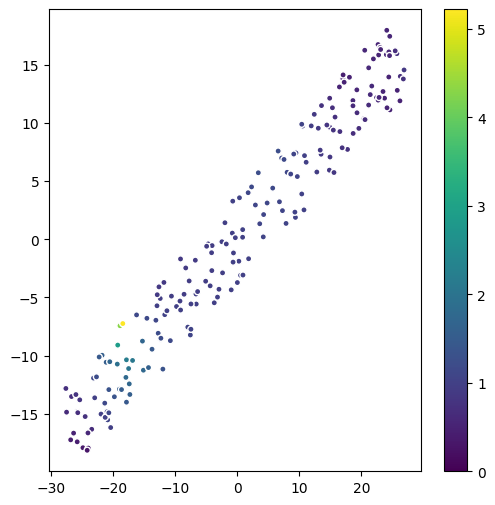

0.9696718547101254


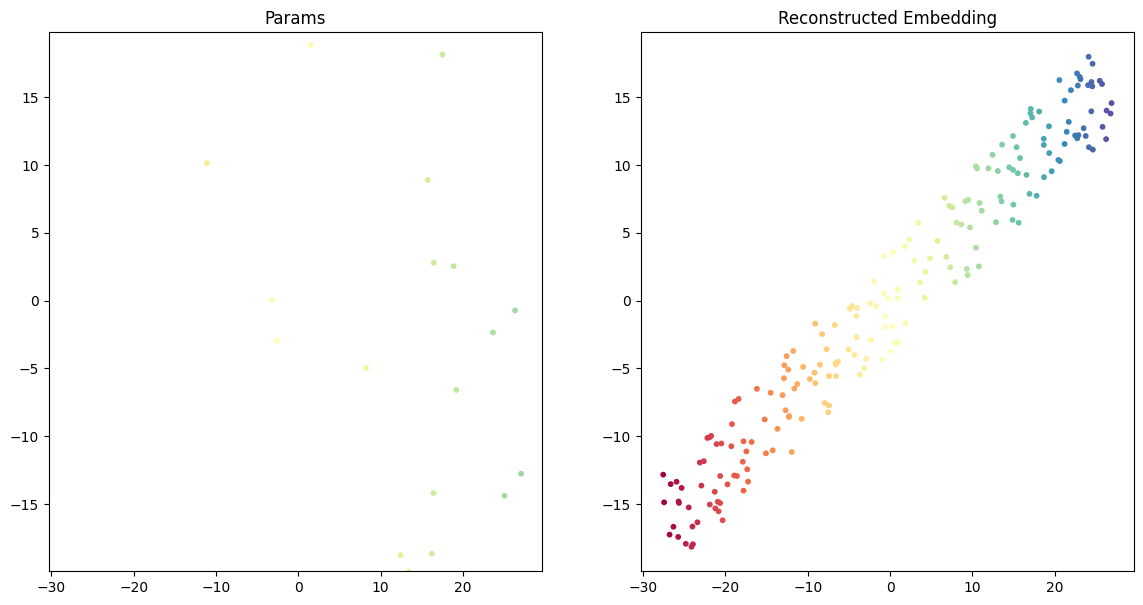

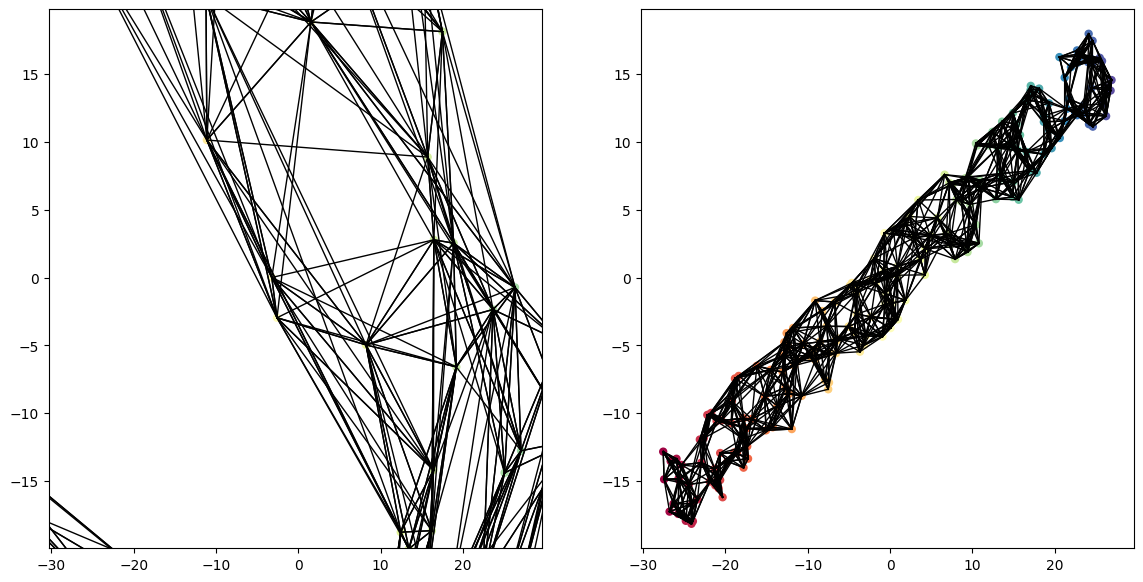

In [16]:
m_ = control_vars.shape[1]
# m_ = get_optimal_dimensionality(s)
ld_embedding = mcu.reduce_dimensions(q, m_)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

rre = mcu.compute_rre(ld_embedding, reconstructed_y)
mcu.plot_rre_heatmap(rre, reconstructed_y)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(ld_embedding, reconstructed_y)
mcu.plot_two_embeddings_with_edges(ld_embedding, reconstructed_y, edges)

In [ ]:
n_of_tests = 100
test_control_vars = swiss_roll_dataset_generator.get_control_vars(swiss_roll_dataset_generator.get_p(), n_of_tests)
test_rolls = swiss_roll_dataset_generator.generate_array_of_swiss_rolls(test_control_vars, n_of_tests)
x_opts = []
for (roll, control_var) in zip(test_rolls, test_control_vars):
    x_opt, x_err = mcu.predictive_optimization(roll, centered_y, ld_embedding, regression_matrix, y_means, y_scaler)
    x_opt = x_opt * x_stds + x_means
    x_opts.append(x_opt)
    print("-----------")
    print(f"x_opt  = {x_opt}, x_err = {x_err}")
    print(f"x_real = {control_var}")

x_ops = np.array(x_opts)
test_control_vars = np.array(test_control_vars)

In [ ]:
errors = np.linalg.norm(x_opts - test_control_vars, axis = 1)
plt.boxplot(errors)
plt.scatter(np.ones_like(errors), errors, alpha=0.5, color='red')
print(errors)
print(f"Median of errors = {np.median(errors)}")